In [2]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [3]:
!python3 -m spacy download en_core_web_sm

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl#egg=en_core_web_sm==3.3.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [8]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [9]:
all_books

[<DirEntry 'test_cryptojacking.txt'>, <DirEntry '1 The Last Wish.txt'>]

In [13]:
book = all_books[0]
# book = cryptojacking
book_text = open(book).read()
print(book_text)

The Problem
Amazon Web Services
Security researchers stumbled upon a long-lasting cryptojacking saga called “EleKtra-Leak.” In this cyber odyssey, mischievous culprits clone public GitHub repositories, making off with exposed AWS credentials. Specifically, key pairs are used to access the victim’s AWS accounts. The “clone and exploit” happens within minutes of an unaware victim accidentally posting a key pair. They then unleash a legion of Amazon Elastic Compute Cloud (EC2) instances to mine the cryptocurrency Monero. Researchers witnessed a staggering 474 miners controlled by what they charmingly call “potentially actor-controlled EC2 instances.”

AWS tries to help with its security practices, diligently alerting when credentials have been compromised. If AWS determines a key pair has been compromised (in this case, made public), they try to shut down the crypto criminals by applying the AWSCompromisedKeyQuarantine policy to the customer’s key pair. (Note: If you get an email from AWS

In [14]:
book_doc = NER(book_text)


In [15]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

## Load character names

In [17]:
# Read characters
character_df = pd.read_csv("characters.csv")
print(character_df.gi(10))

                                  book      character
0  Category:Baptism of Fire characters         Adalia
1  Category:Baptism of Fire characters          Adela
2  Category:Baptism of Fire characters  Aen Saevherne
3  Category:Baptism of Fire characters       Aevenien
4  Category:Baptism of Fire characters         Aglaïs
5  Category:Baptism of Fire characters        Albrich
6  Category:Baptism of Fire characters         Amavet
7  Category:Baptism of Fire characters  Angus Bri Cri
8  Category:Baptism of Fire characters    Anna Kameny
9  Category:Baptism of Fire characters   Anzelm Aubry


In [4]:
# Remove brackets and text within brackets
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [11]:
pd.set_option('display.max_rows', None)
character_df

,book,character,character_firstname
0,Category:Baptism of Fire characters,Adalia,Adalia
1,Category:Baptism of Fire characters,Adela,Adela
2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,Category:Baptism of Fire characters,Aglaïs,Aglaïs
5,Category:Baptism of Fire characters,Albrich,Albrich
6,Category:Baptism of Fire characters,Amavet,Amavet
7,Category:Baptism of Fire characters,Angus Bri Cri,Angus
8,Category:Baptism of Fire characters,Anna Kameny,Anna
9,Category:Baptism of Fire characters,Anzelm Aubry,Anzelm


## Get named entity list per sentence

In [18]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [20]:
glob_entity_list = []

for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    glob_entity_list.extend(entity_list)

print(glob_entity_list)


['Problem', 'Amazon Web Services', 'EleKtra-Leak', 'GitHub', 'minutes', 'Amazon Elastic Compute Cloud', 'Monero', '474', 'AWSCompromisedKeyQuarantine', 'AWSCompromisedKeyQuarantine', 'GitHub', 'VPN', 'more than 400', 'a mere seven minutes', 'CloudTrail', 'VPN', '96', '192 MiB', 'Monero', 'Google Drive', 'Google Drive’s', 'Monero', 'November 2023', '3.696', 'ten', 'seven days', 'GitHub', 'API', 'the day', 'EleKtra-Leak', 'Monero', 'Solution', 'GitHub', 'GitHub', 'Settings', 'two', 'Recommendation', 'Enable', 'GitHub', 'GitHub', 'AI', 'Digital Cloud Training', 'Cloud Mastery Bootcamp', 'Digital Cloud Training', 'Boto3', 'AWS Amplify', 'Amazon', 'Amazon Elastic Compute Cloud', 'Amazon', 'Sysdig', '1.7 million', 'Linux', 'Docker Hub', 'One', 'May 2022', 'GitHub', 'Indonesia', 'Docker', 'One', 'CodeCommit', 'second', 'SageMaker', 'third', 'the Amazon Elastic Container Service', 'Amazon', 'Docker', 'Git', 'Git', 'five', 'Amazon', 'Amazon', 'two', '4', 'RAM', '30', '30', 'AWS CodeBuild', 'Cod

In [19]:
sent_entity_df

,sentence,entities
0,"(﻿The, Problem, \n, Amazon, Web, Services, \n,...","[Problem, Amazon Web Services, EleKtra-Leak]"
1,"(In, this, cyber, odyssey, ,, mischievous, cul...",[GitHub]
2,"(Specifically, ,, key, pairs, are, used, to, a...",[]
3,"(The, “, clone, and, exploit, ”, happens, with...",[minutes]
4,"(They, then, unleash, a, legion, of, Amazon, E...","[Amazon Elastic Compute Cloud, Monero]"
...,...,...
168,"(\n\n, The, bottom, line, \n, The, emergence, ...",[]
169,"(These, less, -, recognized, AWS, offerings, ,...",[]
170,"(\n\n, To, counter, such, threats, ,, organiza...",[]
171,"(Regular, audits, of, Docker, images, and, rep...",[Docker]


In [14]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [17]:
filter_entity(["Geralt", "Thu", "2"], character_df)

['Geralt']

In [35]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
89,"(Is, there, anything, keeping, you, in, this, ...","[Geralt of Rivia, Perfect]",[Geralt of Rivia]
95,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
98,"(And, you, said, that, as, if, you, were, sayi...",[Geralt],[Geralt]
102,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
130,"(\n, "", I, forgot, ,, "", Three, Jackdaws, wink...","[Three Jackdaws, Geralt]",[Geralt]
141,"(Geralt, loosened, his, belt, ,, removed, his,...",[Geralt],[Geralt]
146,"(\n, "", Do, the, girls, speak, the, common, la...",[Geralt],[Geralt]
149,"(How, 's, your, soup, ,, Geralt, ?, "", \n, "", ...",[Geralt],[Geralt]
158,"(Yet, there, is, a, certain, principal, underl...",[Geralt],[Geralt]
185,"(Let, 's, say, a, fierce, dragon, destroys, .....",[Geralt],[Geralt]


In [36]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

/var/folders/2t/5c_z4g5j7z77jprgswwd1htr0000gn/T/ipykernel_61592/364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [ ]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
89,"(Is, there, anything, keeping, you, in, this, ...","[Geralt of Rivia, Perfect]",[Geralt]
95,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
98,"(And, you, said, that, as, if, you, were, sayi...",[Geralt],[Geralt]
102,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
130,"(\n, "", I, forgot, ,, "", Three, Jackdaws, wink...","[Three Jackdaws, Geralt]",[Geralt]
...,...,...,...
10815,"(He, only, saw, black, -, gloved, hands, squee...",[Ciri],[Ciri]
10817,"(Oh, ,, Geralt, !)",[Geralt],[Geralt]
10822,"(Say, it, ,, Geralt, !)",[Geralt],[Geralt]
10824,"(Say, it, !, "", \n, "", Forever, ,, Ciri, ., "",...","[Ciri, Geralt]","[Ciri, Geralt]"


## Create relationships

In [53]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [54]:
relationship_df = pd.DataFrame(relationships)

In [61]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Niedamir,Geralt
1,Niedamir,Geralt
2,Niedamir,Geralt
3,Geralt,Niedamir
4,Geralt,Niedamir
5,Geralt,Niedamir
6,Niedamir,Geralt
7,Niedamir,Geralt
8,Geralt,Niedamir
9,Geralt,Niedamir


In [62]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Geralt,Niedamir
3,Geralt,Niedamir
4,Geralt,Niedamir
5,Geralt,Niedamir
6,Geralt,Niedamir
7,Geralt,Niedamir
8,Geralt,Niedamir
9,Geralt,Niedamir


In [63]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [65]:
relationship_df.head(10)

,source,target,value
0,Geralt,Niedamir,55
1,Eyck,Geralt,30
2,Dorregaray,Geralt,23
3,Dorregaray,Yennefer,56
4,Boholt,Niedamir,20
5,Geralt,Yarpen,16
6,Niedamir,Yarpen,12
7,Geralt,Gyllenstiern,36
8,Geralt,Kennet,2
9,Boholt,Kennet,12


## Graph analysis and visualization

In [66]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

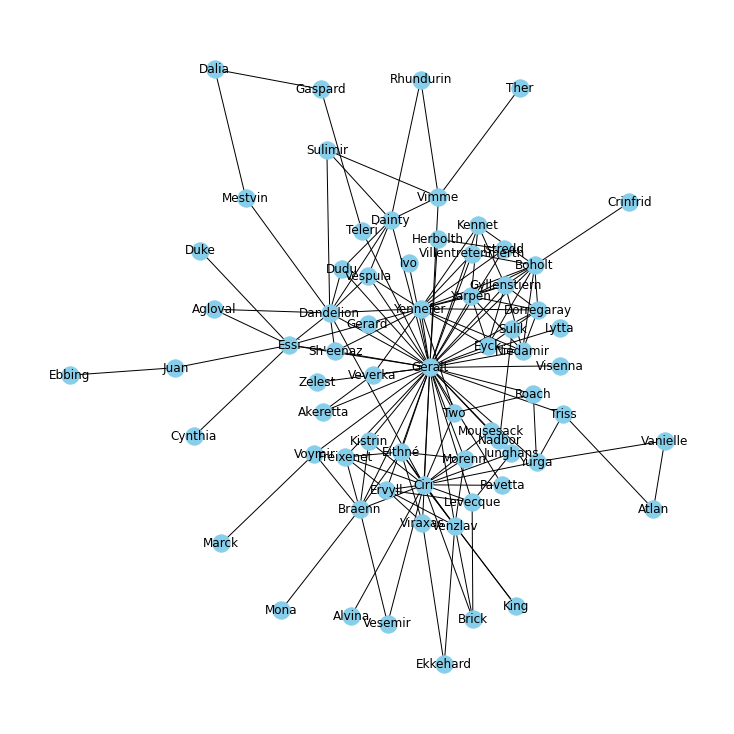

In [ ]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [72]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

### The most important characters in The Witcher

In [77]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.6567164179104478,
 'Niedamir': 0.1044776119402985,
 'Eyck': 0.1044776119402985,
 'Dorregaray': 0.1044776119402985,
 'Yennefer': 0.23880597014925373,
 'Boholt': 0.14925373134328357,
 'Yarpen': 0.11940298507462686,
 'Gyllenstiern': 0.11940298507462686,
 'Kennet': 0.07462686567164178,
 'Crinfrid': 0.014925373134328358,
 'Villentretenmerth': 0.04477611940298507,
 'Istredd': 0.04477611940298507,
 'Herbolth': 0.029850746268656716,
 'Ivo': 0.014925373134328358,
 'Two': 0.05970149253731343,
 'Dandelion': 0.16417910447761194,
 'Vespula': 0.05970149253731343,
 'Dainty': 0.1044776119402985,
 'Vimme': 0.07462686567164178,
 'Sulimir': 0.04477611940298507,
 'Ther': 0.014925373134328358,
 'Rhundurin': 0.029850746268656716,
 'Dudu': 0.04477611940298507,
 "Sh'eenaz": 0.05970149253731343,
 'Gaspard': 0.029850746268656716,
 'Teleri': 0.029850746268656716,
 'Dalia': 0.029850746268656716,
 'Mestvin': 0.029850746268656716,
 'Essi': 0.11940298507462686,
 'Gerard': 0.014925373134328358,
 'Zelest'

<AxesSubplot:>

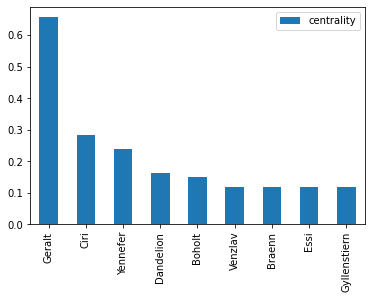

In [78]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

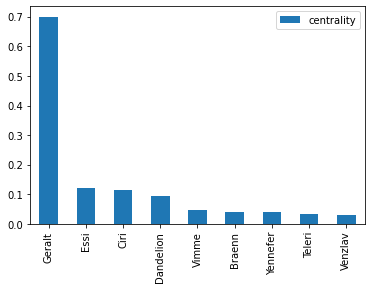

In [79]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

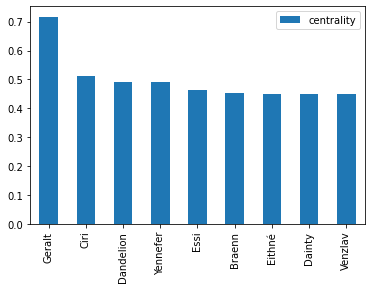

In [80]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [81]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

### Community detection

In [83]:
import community as community_louvain

In [84]:
communities = community_louvain.best_partition(G)

In [85]:
communities

{'Geralt': 2,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Boholt': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 2,
 'Herbolth': 2,
 'Ivo': 2,
 'Two': 0,
 'Dandelion': 4,
 'Vespula': 4,
 'Dainty': 4,
 'Vimme': 4,
 'Sulimir': 4,
 'Ther': 4,
 'Rhundurin': 4,
 'Dudu': 4,
 "Sh'eenaz": 4,
 'Gaspard': 6,
 'Teleri': 6,
 'Dalia': 6,
 'Mestvin': 6,
 'Essi': 4,
 'Gerard': 2,
 'Zelest': 2,
 'Duke': 4,
 'Veverka': 2,
 'Akeretta': 2,
 'Agloval': 4,
 'Ebbing': 4,
 'Juan': 4,
 'Cynthia': 4,
 'Braenn': 3,
 'Ciri': 3,
 'Kistrin': 3,
 'Eithné': 3,
 'Marck': 2,
 'Voymir': 2,
 'Alvina': 3,
 'Vesemir': 3,
 'Ervyll': 3,
 'Freixenet': 3,
 'Venzlav': 3,
 'Ekkehard': 3,
 'Viraxas': 3,
 'Morenn': 3,
 'Mona': 3,
 'Pavetta': 2,
 'Brick': 3,
 'Junghans': 3,
 'Levecque': 3,
 'King': 3,
 'Mousesack': 2,
 'Yurga': 0,
 'Visenna': 2,
 'Triss': 0,
 'Atlan': 0,
 'Vanielle': 0,
 'Lytta': 2,
 'Roach': 0,
 'Nadbor': 5,
 'Sulik': 5}

In [86]:
nx.set_node_attributes(G, communities, 'group')

In [87]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

### Evolution of characters' importance

In [5]:
from lib.utils.functions import *

In [6]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('data') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [7]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

/var/folders/2t/5c_z4g5j7z77jprgswwd1htr0000gn/T/ipykernel_74833/4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
/var/folders/2t/5c_z4g5j7z77jprgswwd1htr0000gn/T/ipykernel_74833/4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


<AxesSubplot:>

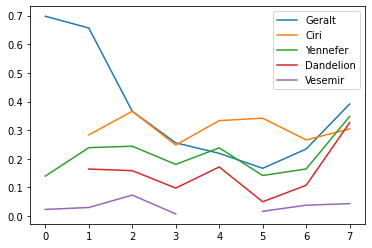

In [8]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()